In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib

# Exploratory Data Analysis

In [ ]:
# Reading the data
pd.set_option('display.max_columns', None)

data = pd.read_csv('Automobile_data.csv')
ad = pd.DataFrame(data)
ad

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
ad.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## Preprocessing

### Data conversions

In [ ]:
# Converting missing values to NaN
ad.replace('?', np.nan, inplace = True)
ad

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
# Float conversion
num_col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
ad[num_col] = ad[num_col].astype(float)

In [ ]:
# Converting symboling to factor
ad['symboling'] = ad['symboling'].astype('category')

In [ ]:
ad.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Duplicates

In [ ]:
# Checking for duplicates
ad[ad.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


### Missing data imputation

In [ ]:
# Identofying missing data
nan_data = ad.isnull()
col_nan_values = []
nan_counts = []
col_dtypes = []

for column in nan_data.columns.values.tolist():
    if True in nan_data[column].value_counts():
        col_nan_values.append(column)
        nan_counts.append(nan_data[column].value_counts()[True])
        col_dtypes.append(ad[column].dtype)

max_length = max(len(column) for column in col_nan_values)
max_dtype_length = max(len(str(dtype)) for dtype in col_dtypes)

print("Variable Name".ljust(max_length + 5), "Counts Missing".ljust(max_length + 1), "Data Type")
for column, count, dtype in zip(col_nan_values, nan_counts, col_dtypes):
    print(f"{column.ljust(max_length + 5)} {count} {''.ljust(max_dtype_length + 10)} {dtype}")

Variable Name          Counts Missing     Data Type
normalized-losses      41                   float64
num-of-doors           2                   object
bore                   4                   float64
stroke                 4                   float64
horsepower             2                   float64
peak-rpm               2                   float64
price                  4                   float64


#### Price

Price Prediction is our primary concern, with the price serving as our key variable of interest. Consequently, any data entry missing price details will be considered unfit for prediction. This means we'll exclude rows without price data from our analysis. Trying to fill in these missing values for the target variable might introduce bias or inaccuracies into our predictions. This is because the missing values may not be randomly distributed and could contain valuable insights about the target variable.

In [ ]:
# Price missing data
ad[ad['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [ ]:
# Drop price missing data rows
ad.dropna(subset=["price"], axis=0, inplace=True)
ad.reset_index(drop=True, inplace=True)

#### Peak-rpm

In [ ]:
# Peak-rpm missing data
ad[ad['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


Examining the car specifications with respect to peak-rpm using violin plots will allows us to delve into the distribution of peak-rpm across various categorical variables, aiding in the identification of trends or associations that may exist within the dataset.

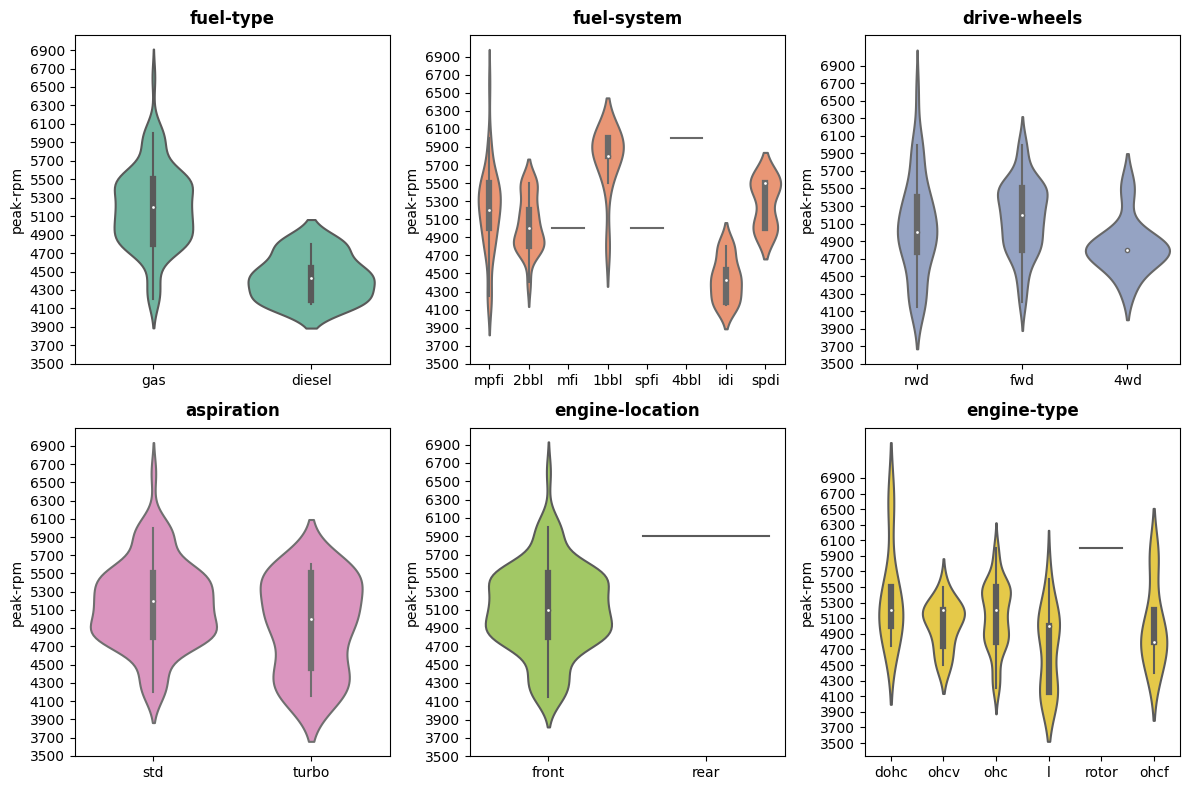

In [ ]:
# Plot car specifications per peak-rpm
peakrpm_specs = ["fuel-type", "fuel-system", "drive-wheels", 
                 "aspiration", "engine-location", "engine-type"]

custom_palette = sns.color_palette("Set2", n_colors=len(peakrpm_specs))

plt.figure(figsize=(12, 8))
for i, feature in enumerate(peakrpm_specs):
    ax = plt.subplot(2, 3, i+1)
    sns.violinplot(x=feature, y='peak-rpm', data=ad, palette=[custom_palette[i]])
    plt.xlabel("")
    ax.xaxis.set_label_position('top')
    ax.set_yticks(range(3500, 7000, 200))
    ax.set_xlabel(feature, fontsize=12, fontweight='bold', labelpad=8)

plt.tight_layout()
plt.show()

We can observe that in these car specifications the most peak-rpm values range from 4800 to 5400. We will take the average peak-rpm in this range from the available car specifications to impute the data.

In [ ]:
# Mean peak-rpm
peakrpm_mean = ad[(ad['peak-rpm'] >= 4800) & (ad['peak-rpm'] <= 5400) &
                   (ad['fuel-type'] == 'gas') &
                   (ad['aspiration'] == 'std') &
                   (ad['drive-wheels'] == 'fwd') &
                   (ad['engine-location'] == 'front') &
                   (ad['engine-type'] == 'ohc') &
                   (ad['fuel-system'] == 'mpfi')]['peak-rpm'].mean().round(-2)

peakrpm_mean

5200.0

In [ ]:
# Imputing peak-rpm missing values
ad["peak-rpm"].fillna(peakrpm_mean, inplace=True)

#### Horsepower

In [ ]:
# Horsepower missing data
ad[ad['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,5200.0,23,31,9295.0
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,5200.0,23,31,9895.0


We'll create a correlation heatmap to swiftly pinpoint the variables that exhibit correlation with horsepower.

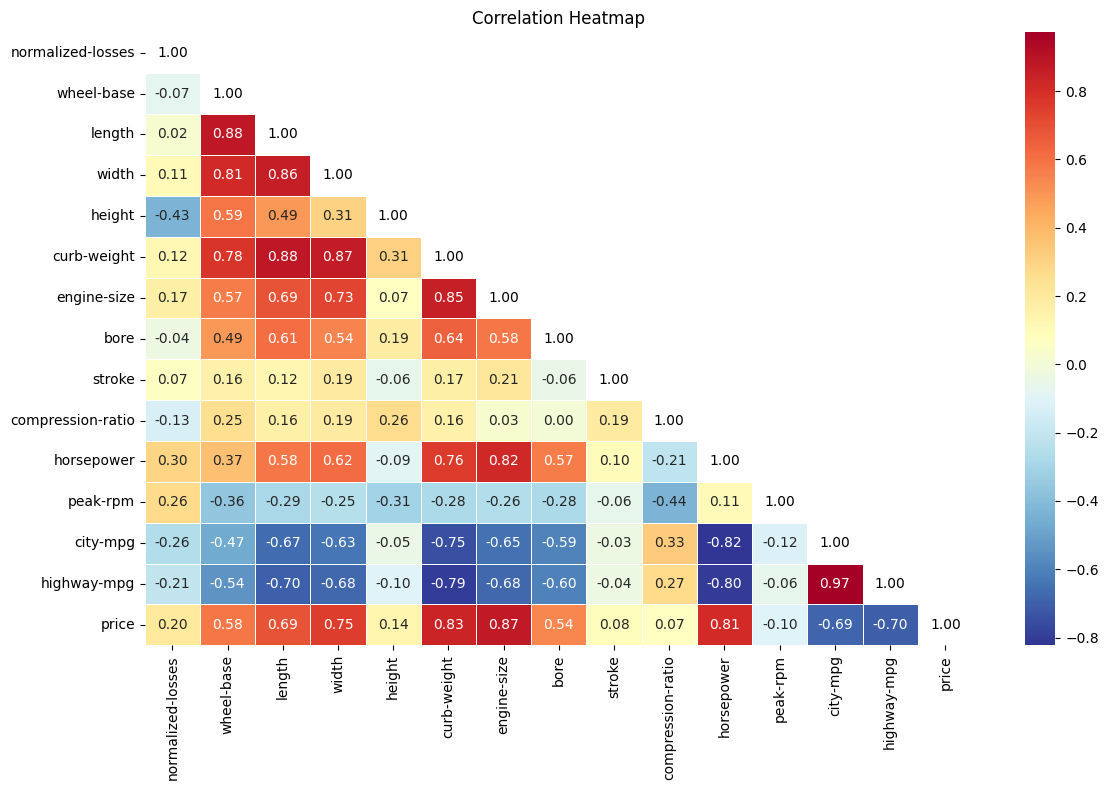

In [ ]:
# Correlation Heatmap
correlation_matrix = ad.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("RdYlBu_r", as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_palette, linewidths=0.5, mask=mask)

for i in range(len(correlation_matrix)):
    plt.text(i+0.5, i+0.5, '1.00', ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

We can observe that the horsepower is most positively correlated with the engine-size and curb-weight (except price, of course), so we will take a look at the +/- 10 ranges of the 132 engine-sizes and +/- 1000 ranges of the 2500 curb-weight.

In [ ]:
# Filtered engine.sizes and curb-weight
ad[((ad['engine-size'] > 122) & (ad['engine-size'] < 142)) &
    ((ad['curb-weight'] > 2500) & (ad['curb-weight'] < 3500))].sort_values(by='engine-size', ascending=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
195,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0
194,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,5200.0,23,31,9295.0
63,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
114,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0


We notice that horsepower values vary for the same engine sizes depending on the fuel type and aspiration. Therefore, we will refine our filtering criteria accordingly.

In [ ]:
# Filtering fuel-type and aspiration
ad[((ad['engine-size'] > 122) & (ad['engine-size'] < 142)) & 
    ((ad['curb-weight'] > 2500) & (ad['curb-weight'] < 3500)) & 
        (ad['fuel-type'] == 'gas') & 
        (ad['aspiration'] == 'std')].sort_values(by='engine-size', ascending=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,NaN,5200.0,23,31,9295.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
187,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2661,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,24,13295.0
62,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
190,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,12940.0


We'll calculate the average horsepower from this subset of data and impute the missing values.

In [ ]:
# Mean horsepower
hp_mean = round(ad[((ad['engine-size'] > 122) & (ad['engine-size'] < 142)) & 
                   ((ad['curb-weight'] > 2500) & (ad['curb-weight'] < 3500)) & 
                       (ad['fuel-type'] == 'gas') & 
                       (ad['aspiration'] == 'std')]['horsepower'].mean(), 0)

hp_mean

113.0

In [ ]:
# Imputing horsepower missing values
ad["horsepower"].fillna(hp_mean, inplace=True)

#### Stroke & Bore

In [ ]:
# Stroke and Bore missing data
print(ad.loc[(ad['stroke'].isnull()) | (ad['bore'].isnull())].to_string(index=False))

symboling  normalized-losses  make fuel-type aspiration num-of-doors body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg   price
        3              150.0 mazda       gas        std          two  hatchback          rwd           front        95.3   169.0   65.7    49.6         2380       rotor              two           70        4bbl   NaN     NaN                9.4       101.0    6000.0        17           23 10945.0
        3              150.0 mazda       gas        std          two  hatchback          rwd           front        95.3   169.0   65.7    49.6         2380       rotor              two           70        4bbl   NaN     NaN                9.4       101.0    6000.0        17           23 11845.0
        3              150.0 mazda       gas        std          two  hatchback          rwd           front 

We observed that the absent data for bore and stroke are correlated, thus we will examine them jointly.

In [ ]:
# Filtering car specifications
ad[(ad['stroke'].notna()) & (ad['bore'].notna()) &
                (ad['make'] == 'mazda') &
                (ad['fuel-type'] == 'gas') &
                (ad['aspiration'] == 'std') &
                (ad['engine-location'] == 'front')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
47,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
48,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1900,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
49,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1905,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
50,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
51,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
56,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
57,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
58,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
59,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
61,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,55.5,2425,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0


In [ ]:
# Mean stroke & bore
car_specs = (ad['make'] == 'mazda') & \
                  (ad['fuel-type'] == 'gas') & \
                  (ad['aspiration'] == 'std') & \
                  (ad['engine-location'] == 'front')

stroke_mean = ad[(ad['stroke'].notna()) & car_specs]['stroke'].mean().round(2)
bore_mean = ad[(ad['bore'].notna()) & car_specs]['bore'].mean().round(2)

print("Mean stroke:", stroke_mean)
print("Mean bore:", bore_mean)

Mean stroke: 3.26
Mean bore: 3.26


In [ ]:
# Imputing stroke & bore missing values
ad.fillna({'stroke': stroke_mean, 'bore': bore_mean}, inplace=True)

#### Num-of-doors

In [ ]:
# Num-of-doors missing data
ad[ad['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


The NaN entries are specific to sedans from the Dodge and Mazda vehicle brands. Therefore, we will filter the dataset accordingly.

In [ ]:
# Filtering car specs
ad[(ad['body-style']=='sedan')  & ((ad['make']=='dodge') | (ad['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
24,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
50,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
51,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
57,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
59,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
62,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
63,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


It appears that the majority of sedans from these manufacturers have four doors. Therefore, we will impute the missing values with four, leveraging known patterns within the data.

In [ ]:
# Imputing num-of-doors missing values
ad["num-of-doors"].replace(np.nan, "four", inplace=True)

#### Normalized-losses

In [ ]:
# Normalized-losses missing data
ad[ad['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0
42,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785.0


Given the significance of this variable to our analysis and the high number of missing data, we will aim to impute these missing values with plausible replacements. We will use IterativeImputer by generating multiple imputed datasets, so that we account for uncertainty in the imputation process and obtain more reliable estimates of the missing values.

In [ ]:
# IterativeImputer
numerical_columns = ad.select_dtypes(include=['float64', 'int64']).columns
imputer = IterativeImputer(random_state=0, max_iter=10, tol=0.001)
ad[numerical_columns] = imputer.fit_transform(ad[numerical_columns])

In [ ]:
# Check for missing values
ad.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Numeric summary
ad.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,124.397203,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329303,3.256965,10.164279,103.492537,5118.407960,25.179104,30.686567,13207.129353
std,33.787979,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268255,0.316048,4.004965,37.377817,478.183493,6.423220,6.815150,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,120.196561,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Categorical summary
ad_with_symboling = ad.copy()
ad_with_symboling['symboling'] = ad_with_symboling['symboling'].astype('object')
ad_with_symboling.describe(include='object')

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201,201
unique,6,22,2,2,2,5,3,2,6,7,8
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,65,32,181,165,115,94,118,198,145,157,92


In [ ]:
# Export preprocessed data to .csv
ad.to_csv('ad.csv', index=False)

## Key Plots

### Correlation Heatmap

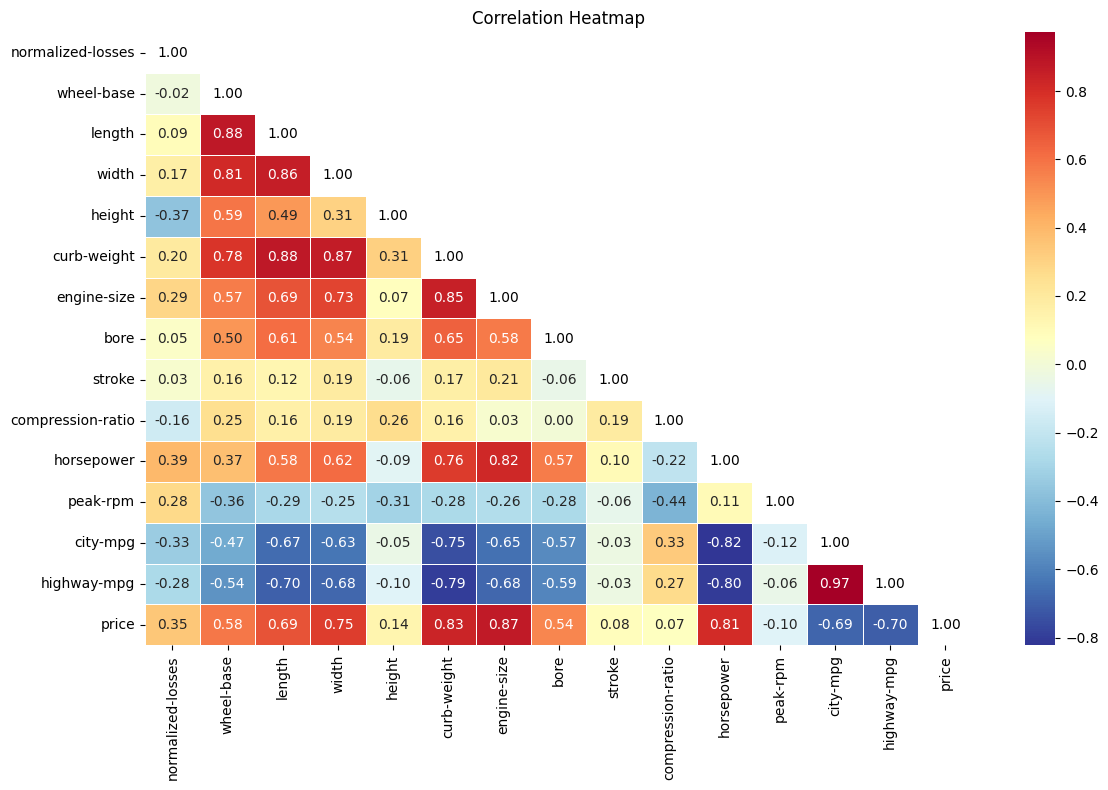

In [ ]:
# Correlation Heatmap
correlation_matrix = ad.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("RdYlBu_r", as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_palette, linewidths=0.5, mask=mask)

for i in range(len(correlation_matrix)):
    plt.text(i+0.5, i+0.5, '1.00', ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Strong Positive Correlations (>0.79):

* Highway mpg and city mpg     
* Length/Width/Engine size/Wheel base and Curb weight 
* Engine size and horsepower   
* Width and length             
* Length/Width and wheel base  


Strong Negative Correlations (<-0.79):

* Horsepower/Curb weight/Engine size and Highway mpg/City mpg

Price is mostly positively correlated with

* Engine size
* Curb weight
* Horsepower

and negatively with

* Highway mpg/City mpg

These correlations suggest certain relationships within the dataset, such as the association between vehicle size (length, width, wheelbase) and weight (curb weight), as well as the relationship between engine size and horsepower.
Additionally, the correlations with mpg variables indicate the trade-off between vehicle performance (horsepower, weight) and fuel efficiency - for example smaller engines are associated with better fuel efficiency (higher mpg) and heavier vehicles tend to have lower fuel efficiency.

### Price Distribution Based on Symboling

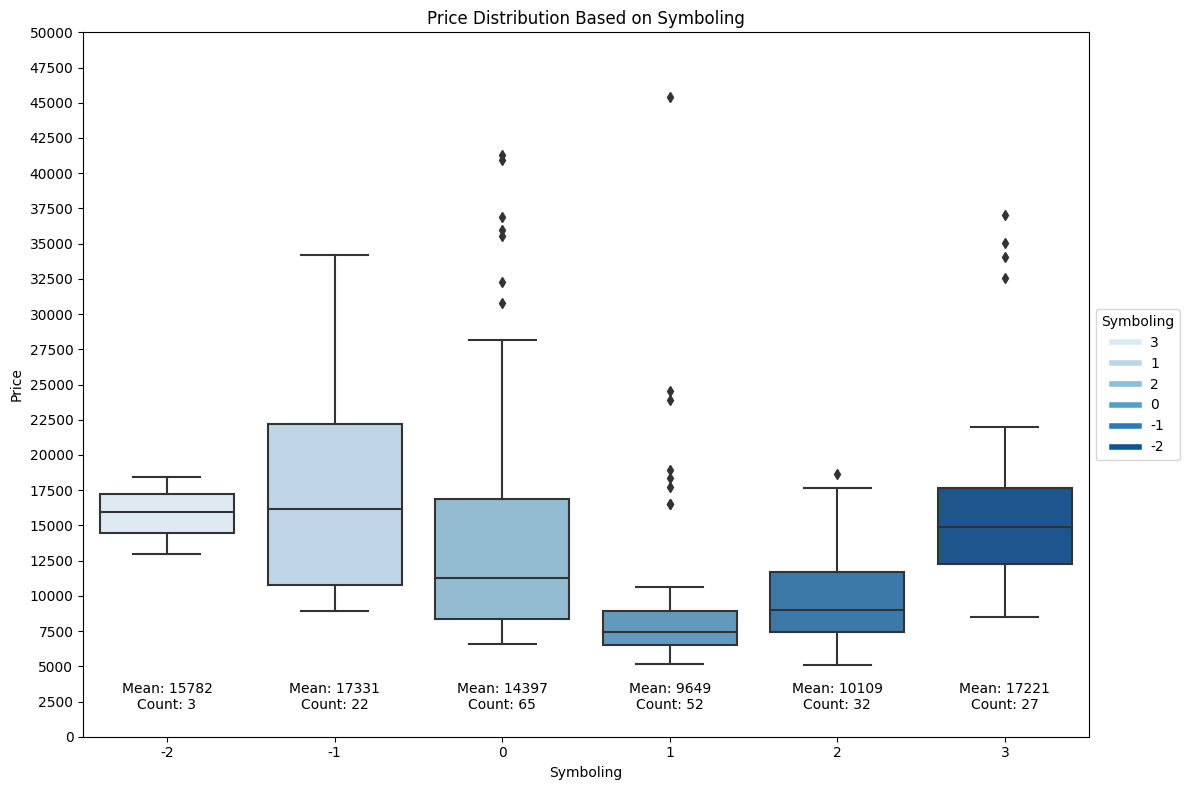

In [ ]:
# Price Distribution Based on Symboling
custom_palette = sns.color_palette("Blues", n_colors=len(ad['symboling'].unique()))

plt.figure(figsize=(12, 8))
sns.boxplot(x='symboling', y='price', data=ad, palette=custom_palette)

mean_prices = ad.groupby('symboling')['price'].mean().round(0)
count_per_symboling = ad['symboling'].value_counts()

for i, (index, mean_price) in enumerate(mean_prices.items()):
    count = count_per_symboling[index]
    plt.text(i, 3100, f'Mean: {mean_price:.0f}', color='black', ha='center')
    plt.text(i, 2000, f'Count: {count}', color='black', ha='center')

legend_labels = ad['symboling'].unique()
legend_handles = [plt.Line2D([0], [0], color=custom_palette[i], lw=4) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, title='Symboling', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Price Distribution Based on Symboling')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.yticks(range(0, 50001, 2500))  
plt.tight_layout()  
plt.show()

* Symboling -1 and 3 have relatively high mean prices, while symboling 0 has the most frequent occurrences in the dataset.
* Symboling -2 has the fewest occurrences, suggesting it may not be as representative in the dataset.
* Symboling 1 and 2 have lower mean prices compared to symboling 0

These results suggest that vehicles with symboling -2 and -1 tend to have higher prices on average, while symboling 0 vehicles are the most frequent in the dataset.
Symboling appears to be a significant factor influencing vehicle prices, with lower symboling values generally associated with higher prices and vice versa.
However, a deeper analysis is warranted to fully understand the relationship between symboling and vehicle prices, as the highest mean prices are observed for symboling -1 (less risky) and 3 (most risky), contrary to the initial expectation.

### Price Distribution by Make with Mean Normalized Losses

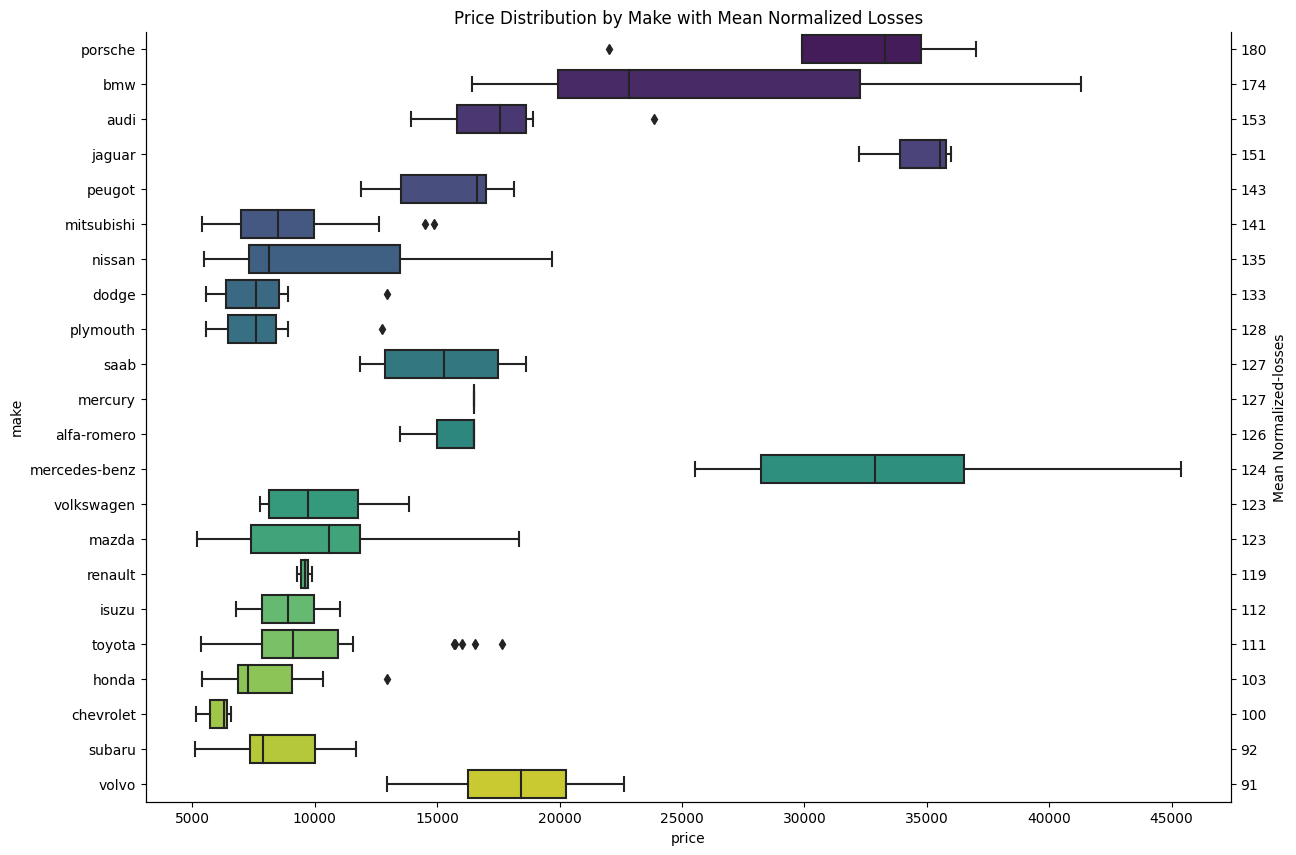

In [ ]:
# Price Distribution by Make with Mean Normalized Losses
mean_losses_per_make = ad.groupby('make')['normalized-losses'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
sns.boxplot(data=ad, y='make', x='price', orient='h', order=mean_losses_per_make.index, palette='viridis')

ax = plt.gca()
ax2 = ax.twinx()
ax2.set_yticks(range(len(mean_losses_per_make)))
ax2.set_yticklabels([f'{mean_loss:.0f}' for mean_loss in mean_losses_per_make], fontsize=10)
ax2.set_ylim(ax.get_ylim())

plt.ylabel('Mean Normalized-losses')
plt.title('Price Distribution by Make with Mean Normalized Losses')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(right=False)
plt.show()

In [ ]:
# Mean normalized-losses and price by make
mean_losses_price_per_make = ad.groupby('make').agg({'price': 'mean','normalized-losses': 'mean'}).round().reset_index().sort_values(by='price', ascending=False)
print(mean_losses_price_per_make)

             make    price  normalized-losses
7          jaguar  34600.0              151.0
9   mercedes-benz  33647.0              124.0
15        porsche  31400.0              180.0
2             bmw  26119.0              174.0
21          volvo  18063.0               91.0
1            audi  17859.0              153.0
10        mercury  16503.0              127.0
0     alfa-romero  15498.0              126.0
13         peugot  15489.0              143.0
17           saab  15223.0              127.0
8           mazda  10653.0              123.0
12         nissan  10416.0              135.0
20     volkswagen  10078.0              123.0
19         toyota   9886.0              111.0
16        renault   9595.0              119.0
11     mitsubishi   9240.0              141.0
6           isuzu   8916.0              112.0
18         subaru   8541.0               92.0
5           honda   8185.0              103.0
14       plymouth   7963.0              128.0
4           dodge   7875.0        

* Among the luxury car brands, Jaguar has the highest average price, followed closely by Mercedes-Benz, Porsche and BMW.
* In contrast, Chevrolet has the lowest average price.
* Interestingly, Volvo, known for its safety features, has a moderate average price and a relatively low normalized loss, suggesting good overall value and potentially lower insurance costs.

# Models for price predicting

## Feature generation

The features below are chosen because they capture different aspects of the vehicle's characteristics that are known to influence its price, such as size, efficiency, and performance.

* Body Volume captures the overall size of the vehicle,
* Curb Weight to Engine Size Ratio provides insight into the efficiency of the vehicle,
* Average MPG provides a single metric representing the fuel efficiency and
* Power to Weight Ratio reflects its performance capabilities relative to its mass

Integrating these features into the dataset has the potential to enhance the predictive capability of the models, while ensuring the exclusion of correlated variables among them.

In [ ]:
# Features generation
ad_fe = ad.copy()
ad_fe['body_volume'] = ad['length'] * ad['width'] * ad['height']
ad_fe['curb_weight_engine_size'] = ad['curb-weight'] / ad['engine-size']
ad_fe['avg_mpg'] = (ad['highway-mpg'] + ad['city-mpg']) / 2
ad_fe['power_weight_ratio'] = ad['horsepower'] / ad['curb-weight']
ad_fe

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body_volume,curb_weight_engine_size,avg_mpg,power_weight_ratio
0,3,122.869249,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,528019.904,19.600000,24.0,0.043564
1,3,128.611880,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,528019.904,19.600000,24.0,0.043564
2,1,127.040193,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,587592.640,18.572368,22.5,0.054552
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,634816.956,21.440367,27.0,0.043646
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,636734.832,20.764706,20.0,0.040722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,721961.760,20.936170,25.5,0.038618
197,-1,95.000000,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,720913.920,21.624113,22.0,0.052476
198,-1,95.000000,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,721961.760,17.410405,20.5,0.044489
199,-1,95.000000,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,721961.760,22.186207,26.5,0.032950


In [ ]:
ad_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   symboling                201 non-null    category
 1   normalized-losses        201 non-null    float64 
 2   make                     201 non-null    object  
 3   fuel-type                201 non-null    object  
 4   aspiration               201 non-null    object  
 5   num-of-doors             201 non-null    object  
 6   body-style               201 non-null    object  
 7   drive-wheels             201 non-null    object  
 8   engine-location          201 non-null    object  
 9   wheel-base               201 non-null    float64 
 10  length                   201 non-null    float64 
 11  width                    201 non-null    float64 
 12  height                   201 non-null    float64 
 13  curb-weight              201 non-null    float64 
 14  engine-typ

In [ ]:
ad_fe['symboling'] = ad_fe['symboling'].astype(float)

## Model building

Following the Exploratory Data Analysis (EDA) and the Multiple Correspondence Analysis (MCA) performed (as detailed in the Mladenova_Data_Scientist_MCA_Project1.Rmd file), it became evident that certain numerical variables exhibit strong correlations among themselves, so we will use for the models our generated features alongside the categorical variables that have demonstrated considerable influence on the price. This approach is aimed at maximizing the predictive capability of our models by incorporating both the engineered features and the impactful categorical variables.

In [ ]:
# Features selection
model_vars = ['price',
                'symboling', 'normalized-losses', 'body_volume', 'curb_weight_engine_size', 'power_weight_ratio', 'avg_mpg', 
                'make', 'aspiration', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders']

ad_model = ad_fe[model_vars].copy()
ad_model

,price,symboling,normalized-losses,body_volume,curb_weight_engine_size,power_weight_ratio,avg_mpg,make,aspiration,drive-wheels,engine-location,engine-type,num-of-cylinders
0,13495.0,3.0,122.869249,528019.904,19.600000,0.043564,24.0,alfa-romero,std,rwd,front,dohc,four
1,16500.0,3.0,128.611880,528019.904,19.600000,0.043564,24.0,alfa-romero,std,rwd,front,dohc,four
2,16500.0,1.0,127.040193,587592.640,18.572368,0.054552,22.5,alfa-romero,std,rwd,front,ohcv,six
3,13950.0,2.0,164.000000,634816.956,21.440367,0.043646,27.0,audi,std,fwd,front,ohc,four
4,17450.0,2.0,164.000000,636734.832,20.764706,0.040722,20.0,audi,std,4wd,front,ohc,five
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,16845.0,-1.0,95.000000,721961.760,20.936170,0.038618,25.5,volvo,std,rwd,front,ohc,four
197,19045.0,-1.0,95.000000,720913.920,21.624113,0.052476,22.0,volvo,turbo,rwd,front,ohc,four
198,21485.0,-1.0,95.000000,721961.760,17.410405,0.044489,20.5,volvo,std,rwd,front,ohcv,six
199,22470.0,-1.0,95.000000,721961.760,22.186207,0.032950,26.5,volvo,turbo,rwd,front,ohc,six


In [ ]:
# Creating Dummy variables
cat_cols = ad_model.select_dtypes(include=['object']).columns.tolist()
encoded_data = pd.get_dummies(ad_model, columns = cat_cols)
encoded_data.shape
encoded_data

,price,symboling,normalized-losses,body_volume,curb_weight_engine_size,power_weight_ratio,avg_mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,13495.0,3.0,122.869249,528019.904,19.600000,0.043564,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,3.0,128.611880,528019.904,19.600000,0.043564,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,1.0,127.040193,587592.640,18.572368,0.054552,22.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,2.0,164.000000,634816.956,21.440367,0.043646,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,2.0,164.000000,636734.832,20.764706,0.040722,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,16845.0,-1.0,95.000000,721961.760,20.936170,0.038618,25.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
197,19045.0,-1.0,95.000000,720913.920,21.624113,0.052476,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
198,21485.0,-1.0,95.000000,721961.760,17.410405,0.044489,20.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
199,22470.0,-1.0,95.000000,721961.760,22.186207,0.032950,26.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Splitting into features(X) and target(y)
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']

In [ ]:
# Splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((134, 48), (67, 48), (134,), (67,))

In [ ]:
# Standardization, fitting and transformation
scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

## Linear Regression

In [ ]:
# LR model
lr_model = LinearRegression()
lr_model.fit(std_X_train, y_train)
print('Train accuracy:', round(lr_model.score(std_X_train, y_train), 5), '\nTest accuracy:', round(lr_model.score(std_X_test, y_test), 6))

Train accuracy: 0.94774 
Test accuracy: 0.827408


In [ ]:
# Evaluation metrics
pd.set_option('display.float_format', '{:.5f}'.format)

y_pred = lr_model.predict(std_X_test)

lr_model_eval = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'],
    'Value': [
        metrics.mean_absolute_error(y_test, y_pred),
        metrics.mean_squared_error(y_test, y_pred),
        np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        metrics.r2_score(y_test, y_pred)]
})

lr_model_eval

,Metric,Value
0,Mean Absolute Error,1850.67708
1,Mean Squared Error,7116825.18913
2,Root Mean Squared Error,2667.73784
3,R2 Score,0.82741


* Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. In this case, on average, the linear regression model's predictions are around 1850.68 off from the actual values.
* Mean Squared Error (MSE) calculates the average of the squared differences between the predicted and actual values - lower values indicate better performance.
* Root Mean Squared Error is the square root of the MSE, providing a measure of the spread of errors in the predictions. In this case, on average, the model's predictions are approximately 2667.74 off from the actual values.
* R-squared (R2) Score represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). An R2 score of 0.8274 suggests that approximately 82.74% of the variance in the price variable is explained by the independent variables. Higher R2 scores indicate a better fit of the model to the data.

**To further improve the model's performance we could use:**
* visualizing the results to identify paterns and adjust the model
* additional features or transforming existing ones,
* refining the set of features used in the model (e.g. recursive feature elimination to identify and retain only the most important features),
* fine-tune the hyperparameters,
* combine multiple models together (e.g. boosting, stacking,etc.),
* further preprocess the data to address any remaining issues such as outliers, or skewness,
* cross-Validation (e.g k-fold) techniques to better estimate the model's performance on unseen data and reduce the risk of overfitting.

By iteratively applying these strategies and evaluating the model's performance on validation data, it's possible to incrementally improve the model and develop a more accurate predictor of the target variable.

**As for the scope of this project, we will use the chosen parameters and evaluate the performance between different types of models.**

In [ ]:
# Evaluation metrics
def evaluate_model(model):
    model.fit(std_X_train, y_train)

    y_pred = model.predict(std_X_test)

    train_accuracy = round(model.score(std_X_train, y_train), 5)
    test_accuracy = round(model.score(std_X_test, y_test), 6)

    eval_metrics = pd.DataFrame({
        'Metric': ['Train Accuracy', 'Test Accuracy', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R2 Score'],
        'Value': [
            train_accuracy,
            test_accuracy,
            metrics.mean_absolute_error(y_test, y_pred),
            metrics.mean_squared_error(y_test, y_pred),
            np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
            metrics.r2_score(y_test, y_pred)]
    })
    
    return eval_metrics

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model_eval = evaluate_model(lr_model)
lr_model_eval

,Metric,Value
0,Train Accuracy,0.94774
1,Test Accuracy,0.82741
2,Mean Absolute Error,1850.67708
3,Mean Squared Error,7116825.18913
4,Root Mean Squared Error,2667.73784
5,R2 Score,0.82741


## Ridge Regression

Ridge regression is a regularization used in linear regression to mitigate multicollinearity and overfitting by adding a penalty term to the least squares objective. It introduces bias into the estimates, but reduces variance, leading to more stable and reliable predictions, especially when dealing with high-dimensional datasets. By shrinking the coefficients towards zero, ridge regression encourages simpler models that generalize better to unseen data.

In [ ]:
# Ridge Regresion Model
rr_model = Ridge(random_state=15)
rr_model_eval = evaluate_model(rr_model)
rr_model_eval

,Metric,Value
0,Train Accuracy,0.94771
1,Test Accuracy,0.82795
2,Mean Absolute Error,1842.14530
3,Mean Squared Error,7094579.96943
4,Root Mean Squared Error,2663.56527
5,R2 Score,0.82795


## Decision tree

In [ ]:
# Decision tree Model
dt_model = DecisionTreeRegressor(min_samples_split = 5, min_samples_leaf = 5 ,random_state = 15)
dt_model_eval = evaluate_model(dt_model)
dt_model_eval

,Metric,Value
0,Train Accuracy,0.95446
1,Test Accuracy,0.71752
2,Mean Absolute Error,2191.12242
3,Mean Squared Error,11647862.54727
4,Root Mean Squared Error,3412.89650
5,R2 Score,0.71752


## Random forest

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(max_depth = 10, min_samples_split = 5, random_state = 15)
rf_model_eval = evaluate_model(rf_model)
rf_model_eval

,Metric,Value
0,Train Accuracy,0.97131
1,Test Accuracy,0.79363
2,Mean Absolute Error,1714.27611
3,Mean Squared Error,8509822.42995
4,Root Mean Squared Error,2917.15999
5,R2 Score,0.79363


## XGboost

In [ ]:
# XGboost Model
xgb_model = XGBRegressor(max_depth = 5, learning_rate = 0.3, random_state = 15)
xgb_model_eval = evaluate_model(xgb_model)
xgb_model_eval

,Metric,Value
0,Train Accuracy,0.99995
1,Test Accuracy,0.71210
2,Mean Absolute Error,1922.46494
3,Mean Squared Error,11871676.29841
4,Root Mean Squared Error,3445.52990
5,R2 Score,0.71210


# Model comparison

In [ ]:
# Model comparison
lr_model_eval['Model'] = 'lr'
rr_model_eval['Model'] = 'rr'
dt_model_eval['Model'] = 'dt'
rf_model_eval['Model'] = 'rf'
xgb_model_eval['Model'] = 'xgb'

model_comp = pd.concat([lr_model_eval, rr_model_eval, dt_model_eval, rf_model_eval, xgb_model_eval])
model_comp = model_comp.pivot(index='Model', columns='Metric', values='Value')
model_comp = model_comp.sort_values(by='Test Accuracy', ascending=False)
model_comp

Metric,Mean Absolute Error,Mean Squared Error,R2 Score,Root Mean Squared Error,Test Accuracy,Train Accuracy
Model,,,,,,
rr,1842.14530,7094579.96943,0.82795,2663.56527,0.82795,0.94771
lr,1850.67708,7116825.18913,0.82741,2667.73784,0.82741,0.94774
rf,1714.27611,8509822.42995,0.79363,2917.15999,0.79363,0.97131
dt,2191.12242,11647862.54727,0.71752,3412.89650,0.71752,0.95446
xgb,1922.46494,11871676.29841,0.71210,3445.52990,0.71210,0.99995


The model comparison highlights several key findings regarding their performance across the different metrics.
Random Forest (rf) demonstrates the lowest Mean Absolute Error (MAE) , indicating it tends to have smaller prediction errors on average compared to other models. Additionally, Random Forest achieves a relatively high R2 Score, suggesting that approximately 79.36% of the variance in the data is captured by the model.
Linear Regression (lr) and Ridge Regression (rr) showcase similar performance with slightly higher MAE compared to Random Forest. But in the context of a car price, 100 is a very small difference. Both lr and rr models achieve the highest R2 Scores, suggesting a good fit to the data.
Decision Tree (dt) and XGBoost (xgb) models exhibit higher MAE and MSE compared to other models, implying that they may struggle more with prediction accuracy.

**It shoud be mentioned again, that this is just a general comparison between the models, without any additional fine tunnings, refinings and cross-validations, so a better performing models could be build with further analysis. The best-performing model ultimately depends on the specific requirements.**

In [ ]:
# Save the rr model for a web app
joblib.dump(rr_model, 'ridge_regression_model.pkl')

['ridge_regression_model.pkl']

# High-level plan of action


1. **Requirement Analysis:**
   - Understand the specific needs and objectives of the automobile manufacturing firm.
   - Identify the key features and functionalities required in the web applicati
on.

2. **Data Integration:**
   - Establish data pipelines to collect and preprocess relevant data from various sources within the manufacturing firm, such as production data, supply chain data, and customer feedback.
   - Ensure data quality and consistency through data cleaning and normalization processes.

3. **Model Integration:**
   - Integrate the trained machine learning models (Random Forest, Linear Regression, etc.) into the backend of the web application.
   - Use appropriate frameworks or libraries (e.g., Flask for Python-based applications) to deploy the models as APIs or microservices.

4. **API Development:**
   - Design RESTful APIs to expose the model functionalities to the frontend of the web application.
   - Define clear endpoints for model inference, allowing users to submit input data and receive predictions or insights.

5. **Security Measures:**
   - Implement authentication and authorization mechanisms to ensure secure access to the web application, especially for B2B use.
   - Encrypt sensitive data and ensure compliance with relevant data protection regulations (e.g., GDPR, HIPAA).

6. **Scalability and Performance Optimization:**
   - Design the backend architecture to handle potential increases in user traffic and data volume.
   - Implement caching mechanisms to optimize response times for frequently requested data or predictions.
   - Monitor system performance and conduct regular performance tuning to maintain optimal efficiency.

7. **User Interface Development:**
   - Develop a user-friendly interface for the web application, tailored to the needs of B2B users in the automobile manufacturing industry.
   - Incorporate visualization tools (e.g., charts, graphs) to present model predictions and insights in an intuitive manner.

8. **Testing and Validation:**
   - Conduct comprehensive testing of the web application, including unit testing, integration testing, and end-to-end testing.
   - Validate the accuracy and reliability of the model predictions against real-world data to ensure business relevance.

9. **Deployment and Maintenance:**
   - Deploy the web application to a secure and reliable hosting environment, such as cloud-based infrastructure (e.g., AWS, Azure).
   - Establish monitoring and alerting systems to detect and address any issues or anomalies in real-time.
   - Provide ongoing maintenance and support to ensure the continued functionality and performance of the web application.

### Technological Choices:
- **Backend Framework:** Flask or Django in Python for their simplicity, scalability, and compatibility with machine learning libraries.
- **API Development:** Flask-RESTful or FastAPI for building robust and efficient APIs.
- **Security:** Integration of JWT (JSON Web Tokens) for authentication and authorization.
- **Deployment:** Docker containers for containerization and Kubernetes for container orchestration, ensuring scalability and ease of deployment.
- **Monitoring:** Tools like Prometheus and Grafana for monitoring system metrics and application performance.
- **Database:** Depending on the data requirements, either relational databases (e.g., PostgreSQL) or NoSQL databases (e.g., MongoDB) can be used for adhering tond retrieving data efficiently.

By following this plan, the automobile manufacturing firm can leverage its machine learning models effectively to drive data-driven decision-making and optimize various aspects of its operations, such as production planning supply chain management, and quality control.
